# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/sfpuf2022_1_fall.csv')
df.head()

/var/folders/27/qjg_wpwd1pn4vm80vy6njqmw0000gn/T/ipykernel_32820/399359139.py:5: DtypeWarning: Columns (43,46,49,50,51,52,53,64,68,70,73,74,76,77,81,83,84,85,86,87,88,89,90,92,96,99,100,101,105,106,107,110,112,113,116,118,119,120,123,124,125,126,127,129,136,137,138,139,140,141,143,144,149,150,151,157,158,162,166,170,171,175,186,187,188,189,190,193,195,196,198,199,200,201,202,204,205,206,212,214,215,216,217,218,219,220,222,223,224,225,226,227,228,229,231,232,233,234) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/sfpuf2022_1_fall.csv')


,PUF_ID,SURVEYYR,VERSION,ADM_H_MEDSTA,ADM_H_GHPSW,ADM_H_PDRS,ADM_OP_MDCD,ADM_DUAL_FLAG_YR,ADM_FFS_FLAG_YR,ADM_MA_FLAG_YR,...,PUFF091,PUFF092,PUFF093,PUFF094,PUFF095,PUFF096,PUFF097,PUFF098,PUFF099,PUFF100
0,22000000,2022,1,2,1,1.0,2,3,1,3,...,1596.191490,343.802164,1852.252656,244.592525,1852.383048,390.232070,2294.234457,279.743745,1740.034904,2025.983684
1,22000003,2022,1,1,1,1.0,1,1,1,3,...,1591.480139,1723.527349,8568.913057,10835.911289,1699.614549,9131.733270,1826.126937,1687.244250,8737.272729,1807.261067
2,22000004,2022,1,1,2,1.0,1,1,3,1,...,601.879050,3175.202382,632.808353,719.786074,661.165192,2958.129595,621.418671,3856.882055,710.184580,4612.847387
3,22000011,2022,1,1,1,1.0,4,3,2,2,...,632.511188,718.196261,3708.030145,632.767081,699.205265,709.998833,560.493104,657.260662,613.231183,632.890796
4,22000018,2022,1,1,1,NaN,1,1,1,2,...,35540.271271,30876.551195,4884.253405,7626.937643,31997.933659,35766.069354,5882.486449,5124.390031,31056.666241,31933.689605


The Data Dictionary attempts to mark missings with just an 'Inapplicable/Missing'. 

For categorical variables, it just marks it as 'Inapplicable/Missing' if it doesn't fall within the 1/2 category that indicates Yes/No. In addition, they attempt to categorize these missing values further with 'Don't Know' or 'Refused' codes for some variables. 

The numeric variables are listed by their range of values without any additional explanation of missing‐value handling.

In [22]:
risk_df = df[[ 'RSK_SMKNOWAL', 'RSK_D_ALCFRQ', 'RSK_ALCDAY', 'FAL_FALLTIME', 'ACC_MCWORRY', 'DEM_INCOME', 'DEM_RE_AGE']]
risk_df.head()

,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
0,2.0,0.0,0,NaN,2,1,5
1,2.0,7.0,1,NaN,2,2,2
2,2.0,10.0,2,NaN,2,1,3
3,2.0,0.0,0,NaN,1,1,7
4,2.0,10.0,2,NaN,1,1,10


These variables relate to smoking and drinking habits, along with how many times fallen in the past year and income. I want to explore if these factors have any relationship with each other

In [ ]:
# Cleaning RSK_SMKLSNOW Currently smoke cigarette/cigar/tobacco  
risk_df = risk_df[risk_df['RSK_SMKNOWAL'] != 'R']
risk_df['RSK_SMKNOWAL'] = pd.to_numeric(risk_df['RSK_SMKNOWAL'], errors='coerce')
risk_df['RSK_SMKNOWAL'] = risk_df['RSK_SMKNOWAL'].fillna(0) # filling Na values with 0 to show no smoke 
risk_df.head() 


,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
0,2.0,0.0,0,NaN,2,1,5
1,2.0,7.0,1,NaN,2,2,2
2,2.0,10.0,2,NaN,2,1,3
3,2.0,0.0,0,NaN,1,1,7
4,2.0,10.0,2,NaN,1,1,10


In [24]:
# Cleaning RSK_D_ALCFRQ Number of days/month drink alcohol 
risk_df = risk_df[risk_df['RSK_D_ALCFRQ'] != 'R']
risk_df = risk_df.dropna()
risk_df['RSK_D_ALCFRQ'] = pd.to_numeric(risk_df['RSK_D_ALCFRQ'], errors='coerce')
risk_df.head() 


,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
6,2.0,0.0,0,4,2,2,4
7,2.0,10.0,3,D,D,2,2
8,2.0,0.0,0,5,2,2,2
13,2.0,0.0,0,1,2,2,4
15,2.0,0.0,0,5,1,1,12


In [25]:
# Cleaning RSK_ALCDAY 
risk_df = risk_df[risk_df['RSK_ALCDAY'] != 'R']
risk_df = risk_df.dropna()
risk_df = risk_df[risk_df['RSK_ALCDAY'] != 'D']
risk_df['RSK_ALCDAY'] = pd.to_numeric(risk_df['RSK_ALCDAY'], errors='coerce')
risk_df.head()

,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
6,2.0,0.0,0,4,2,2,4
7,2.0,10.0,3,D,D,2,2
8,2.0,0.0,0,5,2,2,2
13,2.0,0.0,0,1,2,2,4
15,2.0,0.0,0,5,1,1,12


In [26]:
# cleaning FAL_FALLTIME number of times fallen (past year)
risk_df = risk_df[risk_df['FAL_FALLTIME'] != 'D']
risk_df = risk_df.dropna()
risk_df['FAL_FALLTIME'] = pd.to_numeric(risk_df['FAL_FALLTIME'], errors='coerce')
risk_df.head()

,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
6,2.0,0.0,0,4,2,2,4
8,2.0,0.0,0,5,2,2,2
13,2.0,0.0,0,1,2,2,4
15,2.0,0.0,0,5,1,1,12
17,2.0,6.0,2,2,1,2,10


In [27]:
# ACC_MCWORRY worry about health more than ohters your age
risk_df = risk_df[risk_df['ACC_MCWORRY'] != 'R']
risk_df = risk_df[risk_df['ACC_MCWORRY'] != 'D']
risk_df = risk_df.dropna()
risk_df['ACC_MCWORRY'] = pd.to_numeric(risk_df['ACC_MCWORRY'], errors='coerce')
risk_df.head()

,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
6,2.0,0.0,0,4,2,2,4
8,2.0,0.0,0,5,2,2,2
13,2.0,0.0,0,1,2,2,4
15,2.0,0.0,0,5,1,1,12
17,2.0,6.0,2,2,1,2,10


In [ ]:
# DEM_INCOME income under over 25,000 
risk_df['DEM_INCOME'] = pd.to_numeric(risk_df['DEM_INCOME'], errors='coerce')
risk_df.head()

,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
6,2.0,0.0,0,4,2,2,4
8,2.0,0.0,0,5,2,2,2
13,2.0,0.0,0,1,2,2,4
15,2.0,0.0,0,5,1,1,12
17,2.0,6.0,2,2,1,2,10


In [29]:
# DEM_RE_AGE race/age 
risk_df['DEM_RE_AGE'] = pd.to_numeric(risk_df['DEM_RE_AGE'], errors='coerce')
risk_df.head()

,RSK_SMKNOWAL,RSK_D_ALCFRQ,RSK_ALCDAY,FAL_FALLTIME,ACC_MCWORRY,DEM_INCOME,DEM_RE_AGE
6,2.0,0.0,0,4,2,2,4
8,2.0,0.0,0,5,2,2,2
13,2.0,0.0,0,1,2,2,4
15,2.0,0.0,0,5,1,1,12
17,2.0,6.0,2,2,1,2,10


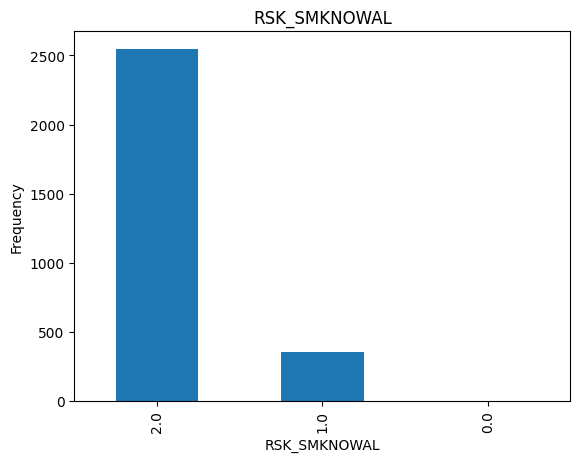

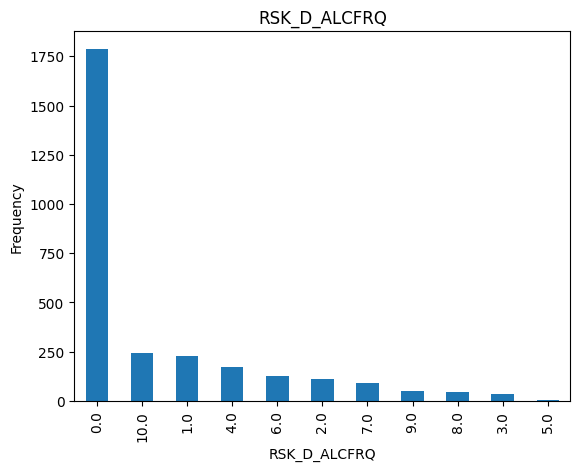

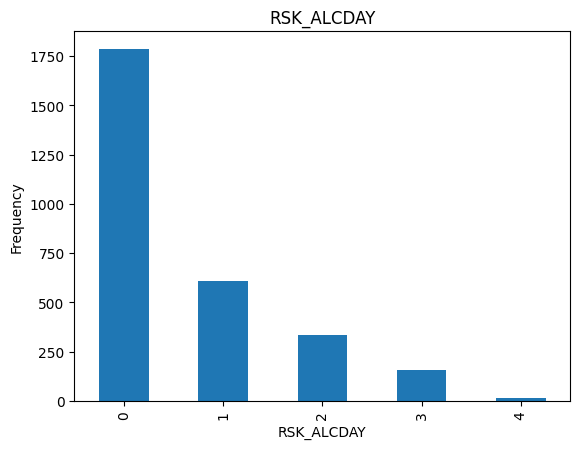

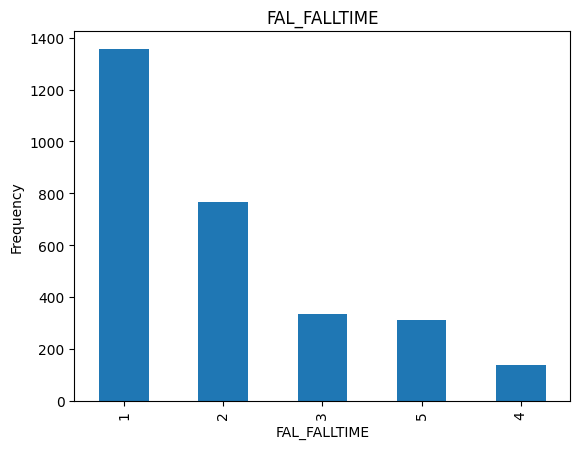

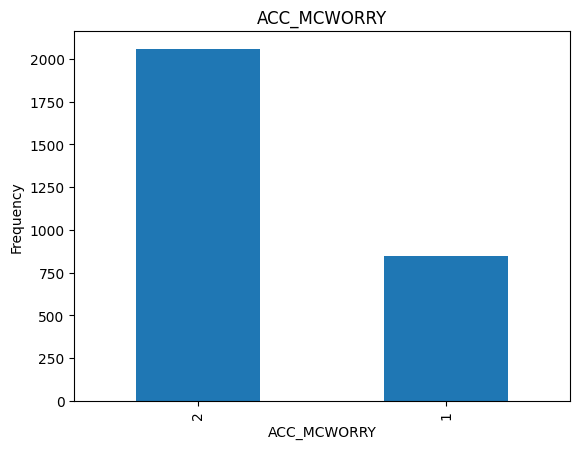

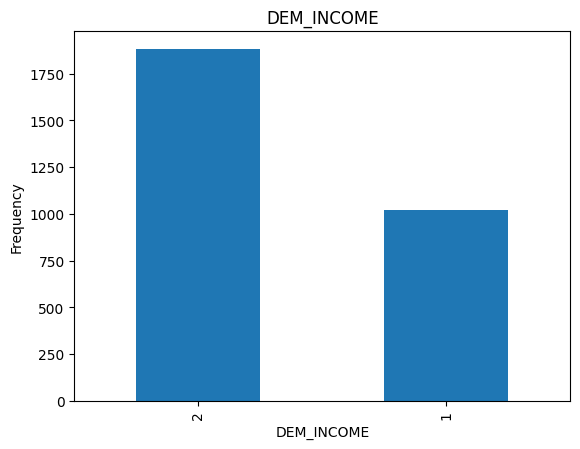

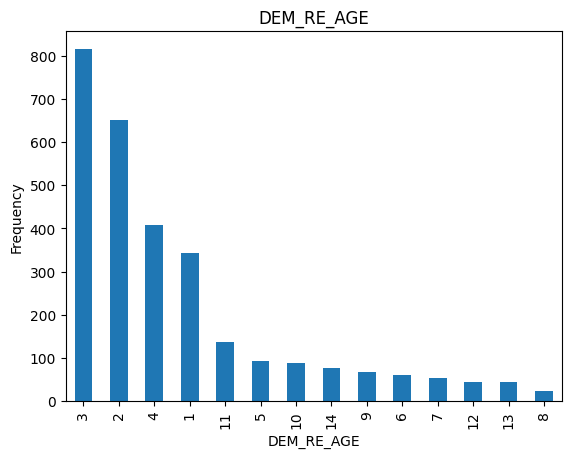

In [30]:
for column in risk_df.columns:
    risk_df[column].value_counts().plot(kind='bar', title=column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

* Noticeably, In RSK_ALCDAY, there is a small outlier in '4'. RSK_ALCDAY measures the number of drinks per day in the past year. The value 4 represents Six or more drinks per day. 
* In RSK_D_ALCFRQ, there's an outlier in '5'. RSK_D_ALCFRQ measures number of days per month drink alcohol. The value '5' represetns Five days a month.

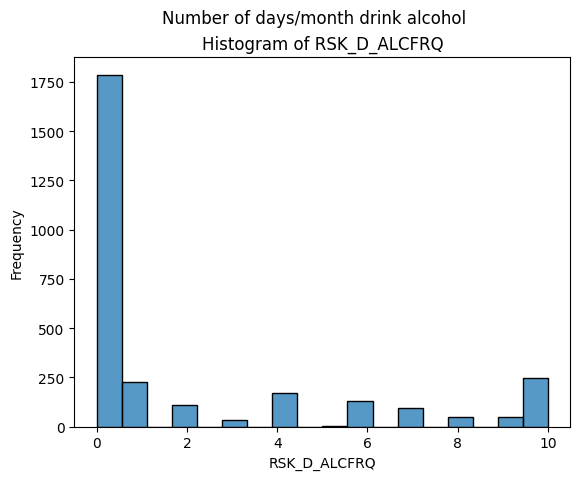

In [43]:
import seaborn as sns

sns.histplot(risk_df['RSK_D_ALCFRQ'], kde=False)
plt.title('Histogram of RSK_D_ALCFRQ')
plt.suptitle('Number of days/month drink alcohol')
plt.xlabel('RSK_D_ALCFRQ')
plt.ylabel('Frequency')
plt.show()

This plot is right-skewed with a sharp peak at 0. This suggests that they are concentrated in the category where they do not drink as much each month. Since the variable represents count data (days per month), a log transformation might help reduce the skewness if the tail is problematic. However, since zero is a valid and common value, a log(x+1) transformation would be more appropriate.

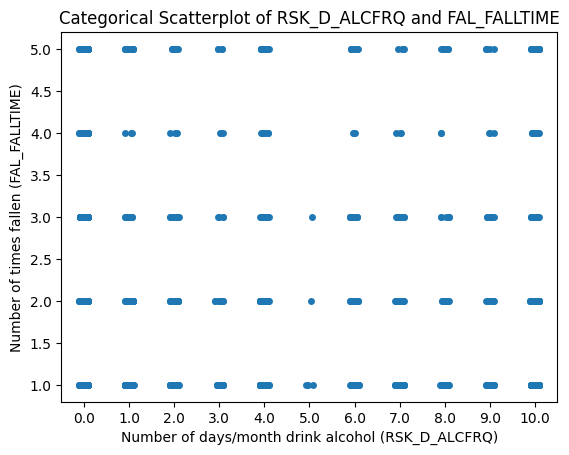

In [45]:
sns.stripplot(x='RSK_D_ALCFRQ', y='FAL_FALLTIME', data=risk_df, jitter=True)
plt.title('Categorical Scatterplot of RSK_D_ALCFRQ and FAL_FALLTIME')
plt.xlabel('Number of days/month drink alcohol (RSK_D_ALCFRQ)')
plt.ylabel('Number of times fallen (FAL_FALLTIME)')
plt.show()

My variables are all categorical variables. The majority of the medical dataset is categorical and it is challenging to make a scatterplot. Scatterplots do not suit categorical variables. Instead, heatmaps of the cross tabulation would make more sense.  

In [49]:
cross_tab = pd.crosstab(risk_df['RSK_D_ALCFRQ'], risk_df['FAL_FALLTIME'])
print(cross_tab)

FAL_FALLTIME    1    2    3    4    5
RSK_D_ALCFRQ                         
0.0           778  489  225  102  193
1.0           119   58   17    3   31
2.0            55   32   12    4    9
3.0            15   10    4    3    4
4.0            87   48   12    6   19
5.0             3    1    1    0    0
6.0            75   26   14    3   11
7.0            46   25   14    3    5
8.0            21    9    6    2    9
9.0            26    9    8    3    5
10.0          132   60   20    9   25


The table suggests that non-drinkers experience falls more frequently than drinkers. For example, individuals drinking 1 day/month have higher counts than those drinking 3 days/month. But, this might be due to other factors. 